In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined_data = pd.read_csv("combined_stats.csv")
combined_data.head()

,game_id,season,week,temp,wind,calendar_week,focus_team,focus_score,focus_temp_delta,did_win,avg_temp,attempts,carries,passing_epa,rushing_epa,conventional_plays_ran,pass_to_run_ratio
0,2015_01_PIT_NE,2015,1,65.0,7.0,37,NE,28,-1.093469,True,66.093469,32,24,15.961351,-0.252627,56,1.333333
1,2015_01_IND_BUF,2015,1,56.0,15.0,37,BUF,27,-9.687551,True,65.687551,19,36,9.972638,-2.539012,55,0.527778
2,2015_01_GB_CHI,2015,1,72.0,11.0,37,CHI,23,2.529143,False,69.470857,36,33,0.229273,7.547915,69,1.090909
3,2015_01_KC_HOU,2015,1,70.0,0.0,37,HOU,20,0.000000,False,70.000000,47,21,-6.469611,-4.144401,68,2.238095
4,2015_01_CAR_JAX,2015,1,77.0,7.0,37,JAX,9,-2.510000,False,79.510000,40,21,-15.522407,-0.896787,61,1.904762


In [5]:
pace_of_play_data = combined_data[["game_id", "temp", "wind", "focus_temp_delta", "attempts", "carries", "conventional_plays_ran"]]
pace_of_play_data

,game_id,temp,wind,focus_temp_delta,attempts,carries,conventional_plays_ran
0,2015_01_PIT_NE,65.0,7.0,-1.093469,32,24,56
1,2015_01_IND_BUF,56.0,15.0,-9.687551,19,36,55
2,2015_01_GB_CHI,72.0,11.0,2.529143,36,33,69
3,2015_01_KC_HOU,70.0,0.0,0.000000,47,21,68
4,2015_01_CAR_JAX,77.0,7.0,-2.510000,40,21,61
...,...,...,...,...,...,...,...
4899,2024_18_KC_DEN,28.0,5.0,-1.048000,17,11,28
4900,2024_18_SEA_LA,70.0,0.0,27.069714,27,24,51
4901,2024_18_LAC_LV,70.0,0.0,0.000000,36,35,71
4902,2024_18_MIA_NYJ,34.0,10.0,-35.752527,41,23,64


Text(0.5, 0.98, 'Histogram of focus_temp_delta')

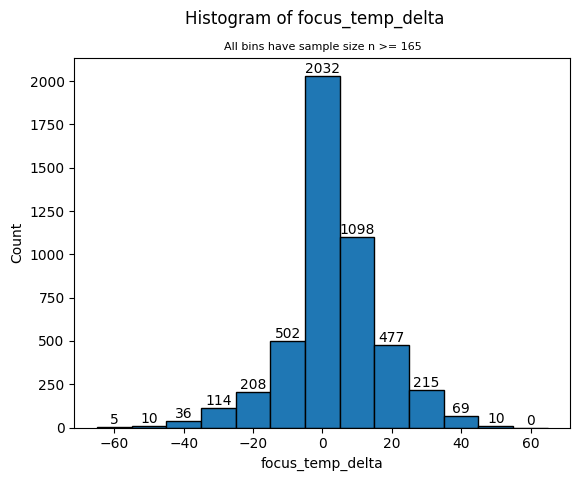

In [69]:
import numpy as np

# Calculate bin edges so that the middle bin is centered on zero
counts, bins, patches = plt.hist(combined_data["focus_temp_delta"], bins=[-65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65], edgecolor='black')
for i in range(len(patches)):
    plt.text(
        (bins[i] + bins[i+1]) / 2,
        counts[i],
        str(int(counts[i])),
        ha='center',
        va='bottom'
    )
plt.xlabel("focus_temp_delta")
plt.ylabel("Count")
plt.title("All bins have sample size n >= 165", fontsize=8)
plt.suptitle("Histogram of focus_temp_delta")

In [73]:
pace_of_play_data["category"] = pace_of_play_data["focus_temp_delta"].apply(lambda x: "Cold" if x < -35 else ("Hot" if x > 35 else "Mild"))
pace_of_play_data["category"].value_counts()

category
Mild    4774
Hot       79
Cold      51
Name: count, dtype: int64

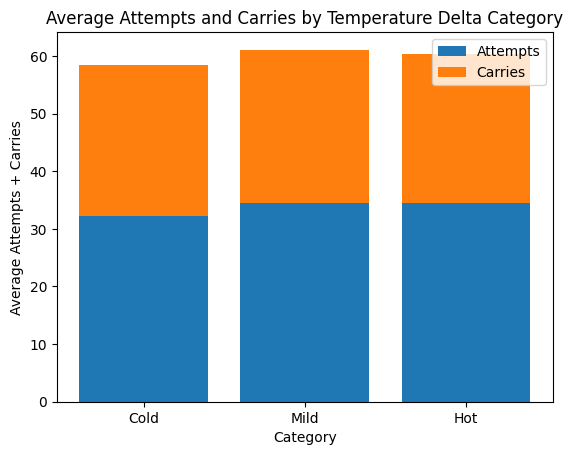

In [80]:
# Bar chart: count per category (ordered cold, mild, hot)
category_order = ["Cold", "Mild", "Hot"]
category_counts = pace_of_play_data["category"].value_counts().reindex(category_order)

# Stacked bar chart: attempts and carries per category
grouped = pace_of_play_data.groupby("category")[["attempts", "carries"]].mean().reindex(category_order)
plt.bar(category_order, grouped["attempts"], label="Attempts")
plt.bar(category_order, grouped["carries"], bottom=grouped["attempts"], label="Carries")
plt.xlabel("Category")
plt.ylabel("Average Attempts + Carries")
plt.title("Average Attempts and Carries by Temperature Delta Category")
plt.legend()
plt.show()

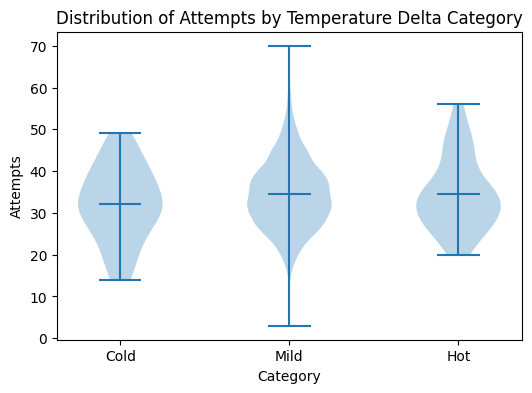

In [84]:
plt.figure(figsize=(6, 4))
data = [pace_of_play_data[pace_of_play_data["category"] == cat]["attempts"] for cat in category_order]
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2, 3], category_order)
plt.xlabel("Category")
plt.ylabel("Attempts")
plt.title("Distribution of Attempts by Temperature Delta Category")
plt.show()

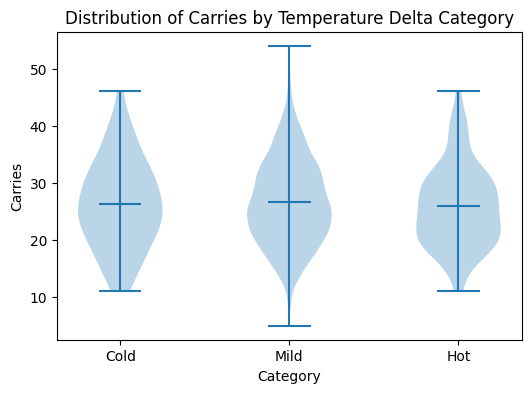

In [85]:
plt.figure(figsize=(6, 4))
data = [pace_of_play_data[pace_of_play_data["category"] == cat]["carries"] for cat in category_order]
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2, 3], category_order)
plt.xlabel("Category")
plt.ylabel("Carries")
plt.title("Distribution of Carries by Temperature Delta Category")
plt.show()